# Week 7 - Review exercises
Introduction to Numerical Problem Solving, Spring 2017   
Chanh Nguyen   
Helsinki Metropolia University of Applied Sciences 

In [3]:
%pylab inline
from math import factorial as fact

Populating the interactive namespace from numpy and matplotlib


# Problem 1
#### a) Draw in the same graph the sine function and its 7th order polynomial approximation in range $x \in [-\pi,\pi]$

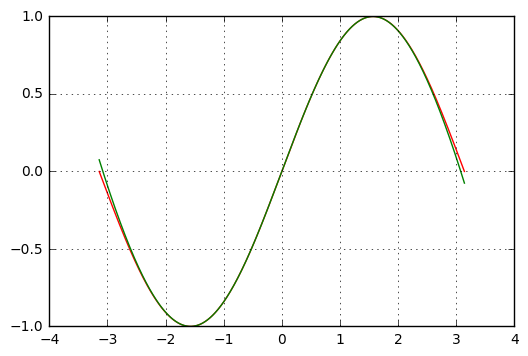

In [42]:
def sinabout7(x):
    y = x - x**3/fact(3) + x**5/fact(5) - x**7/fact(7)
    return y
x = linspace(-pi, pi, 1000)
y = sin(x)
y7 = sinabout7(x)
plot(x, y, 'r', x, y7, 'g')
grid()

#### b) Where (x-value) in the given range does the the 7th order polynomial approximation differ most? How much is the true error in that point?

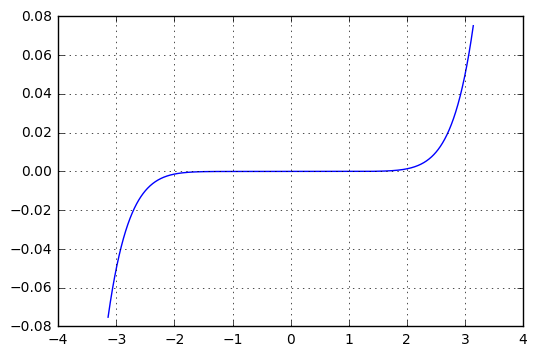

In [28]:
plot(x, y - y7)
grid()

In [29]:
print("The most different is where x = pi or x = -pi")
print("The true error is: "+str(sin(pi)-sinabout7(pi)))

The most different is where x = pi or x = -pi
The true error is: 0.0752206159036


#### (c) What is the largest relative approximation error (in absolute values) between the 5th order and 7th order polynomials within the given range?

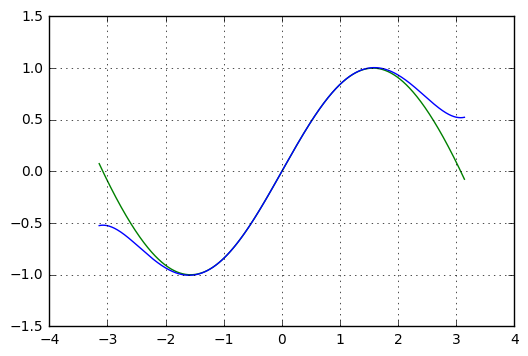

In [30]:
def sinabout5(x):
    y = x - x**3/fact(3) + x**5/fact(5)
    return y
y5 = sinabout5(x)
plot(x, y7, 'g', x, y5, 'b')
grid()

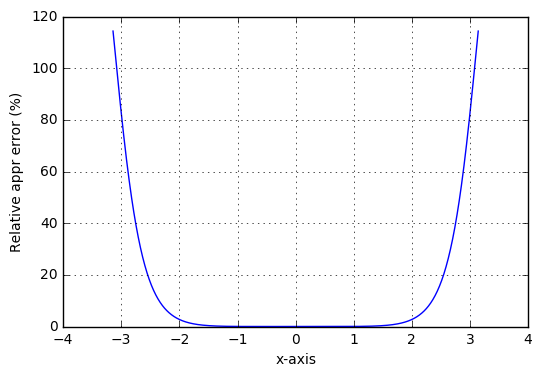

In [31]:
ea = (y5 - y7)/y5
plot(x, ea*100)
ylabel('Relative appr error (%)')
xlabel('x-axis')
grid()

In [32]:
print("The largest relative approximation error is where x = pi or x = -pi")
print("The relative approximation error of the 7th order to the 5th order is: "+str((sinabout5(pi)-sinabout7(pi))/sinabout5(pi)))

The largest relative approximation error is where x = pi or x = -pi
The relative approximation error of the 7th order to the 5th order is: 1.143538764553388


#### (d) How many terms we need in the approximation in order that we have the value of sin(x) correct at least 4 signficant fgures everywhere in the given range?

In [45]:
def sinabout(x,N):
    y = x
    for n in range(1,N):
        y = y + ((-1)**n)*x**(2*n+1)/fact(2*n+1)
    return y

maximum error: 2.11425675583e-05


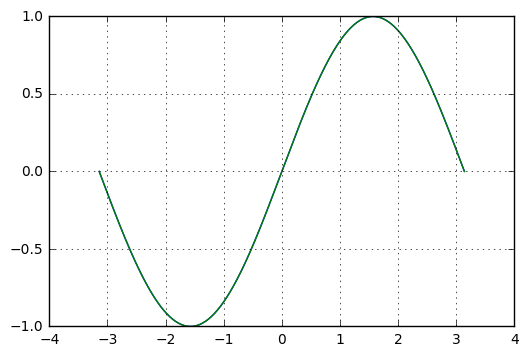

In [46]:
x = linspace(-pi, pi, 1000)
y = sin(x)
ya = sinabout(x, 7)
plot(x, y)
plot(x, ya)
grid()
print('maximum error:', max(abs(y - ya)))

# Problem 2
Use graphical method to solve   
$ 2x_1-6x_2=-18$   
$-x_1+8x_2=40$

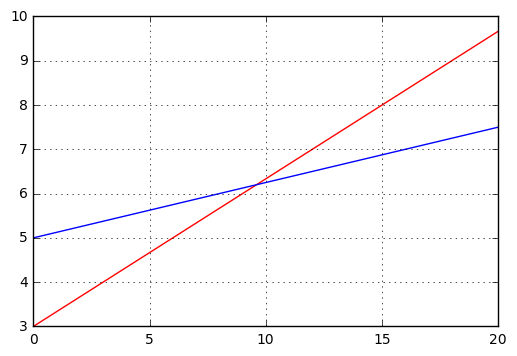

In [43]:
x1 = linspace(0, 20, 100)
x2a = (-18 -2*x1)/(-6)
x2b = (40+x1)/8
plot(x1, x2a, 'r', x1, x2b, 'b')
grid()

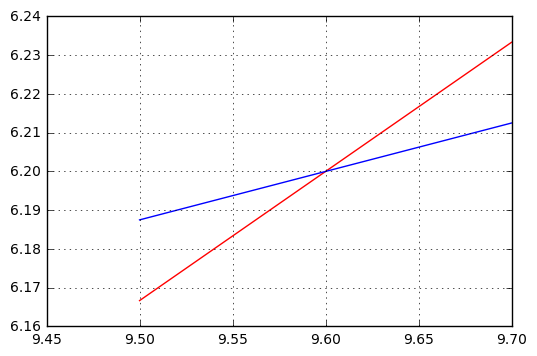

In [15]:
x1 = linspace(9.5, 9.7, 100)
x2a = (-18 -2*x1)/(-6)
x2b = (40+x1)/8
plot(x1, x2a, 'r', x1, x2b, 'b')
grid()

###### The root is (x1,x2) = (9.6,6.2)

# Problem 3
Solve graphically

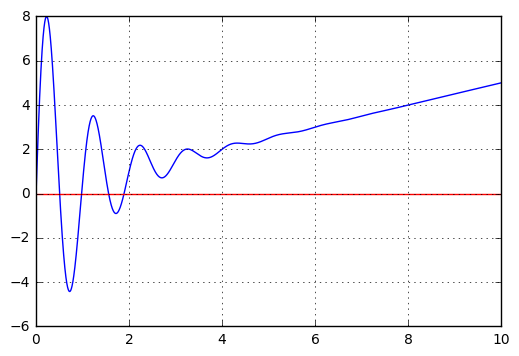

In [17]:
x = linspace(0, 10, 100000)
y = 10.0*exp(-x)*sin(2*pi*x) + 0.5*x
plot(x, y)
axhline(y=.0, xmin=0.0, xmax=10.0, color = "r")
grid()

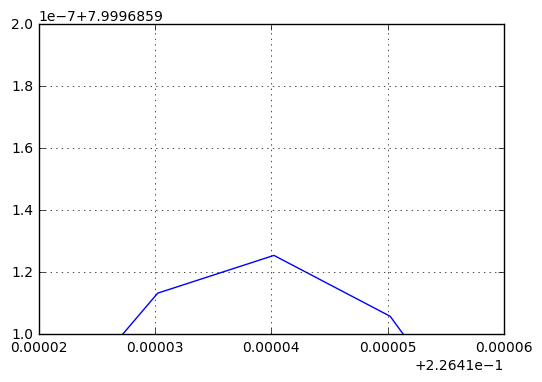

In [44]:
# Zoom in to find the maximum 
x = linspace(0, 10, 1000000)
y = 10.0*exp(-x)*sin(2*pi*x) + 0.5*x
plot(x,y)
xlim([0.22643,0.22647])
ylim([7.9996860,7.9996861])
grid()

###### The maximum is when (x,y) = (0.2265, 7.9997)

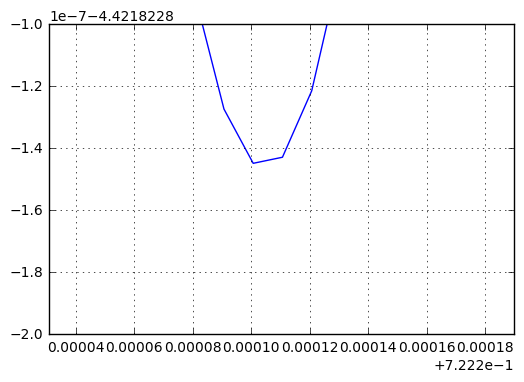

In [45]:
# Zoom in to find the minimum 
x = linspace(0, 10, 1000000)
y = 10.0*exp(-x)*sin(2*pi*x) + 0.5*x
plot(x,y)
xlim([0.722231,0.72239])
ylim([-4.421823,-4.4218229])
grid()

###### The minimum is when (x,y) = (0.7222, -4.4218)

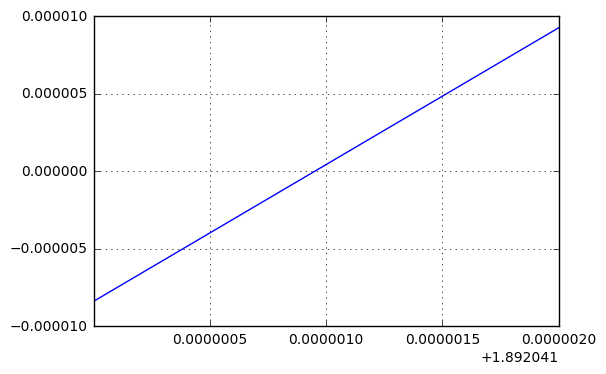

In [46]:
# Zoom in to find the largest root
x = linspace(0, 10, 1000000)
y = 10.0*exp(-x)*sin(2*pi*x) + 0.5*x
plot(x,y)
xlim([1.892041,1.892043])
ylim([-0.00001,0.00001])
grid()

###### The largest root is when x = 1.89204

# Problem 4
Backward substitution for Gaussian elimination

In [1]:
def GaussianElimination(a , b):
    a = a.copy().astype(float)
    b = b.copy().astype(float)
    n = len(a)
    for k in range(n):
        # Check
        if a[k, k] == 0 :
            print(' Unable to solve ')
            return None
        # Forward eliminate
        for i in range(k+1, n):
            factor = a[i, k]/a[k , k]
            for j in range(k+1, n):
                a[i , j] = a[i , j] - factor*a[k , j]
            b[i] = b[i] - factor*b[k]
    
    # Backward substitution
    # Do the calculations in place, e.g. x = b
    for i in range(n-1, -1, -1):
        for j in range(i+1, n):
            b[i] = b[i] - a[i, j]*b[j]
        b[i] = b[i]/a[i, i]
    return b

$$3x_1+2x_2+x_3=1$$
$$x_1+x_2+x_3=2$$
$$5x_1+x_2+2x_3=3$$

In [8]:
A = array([3., 2, 1, 1, 1, 1, 5, 1, 2]).reshape(3, 3)
b = array([1., 2, 3])
print('A:\n', A)
print('b: ', b)

A:
 [[ 3.  2.  1.]
 [ 1.  1.  1.]
 [ 5.  1.  2.]]
b:  [ 1.  2.  3.]


In [50]:
print("The correct solution is ")
solve(A, b)

The correct solution is 


array([ 20.71428571,   7.85714286,  -5.        , -17.85714286, -10.71428571])

In [52]:
x = GaussianElimination(A, b)
print("Use Gaussian Elimination to find solution ")
x

Use Gaussian Elimination to find solution 


array([ 20.71428571,   7.85714286,  -5.        , -17.85714286, -10.71428571])

# Problem 5
Use the Gauss-Seidel iterative method to solve
$$-2x_1+5x_2+9x_3=1$$
$$7x_1+x_2+x_3=6$$
$$-3x_1+7x_2-x_3=-26$$

In [55]:
A = array([-2., 5, 9, 7, 1, 1, -3, 7, -1]).reshape(3, 3)
b = array([1., 6, -26])
print(A)
print(b)
solve(A, b)

[[-2.  5.  9.]
 [ 7.  1.  1.]
 [-3.  7. -1.]]
[  1.   6. -26.]


array([ 1., -3.,  2.])

In [56]:
# Pivot the rows
p = [1, 2, 0]
A = A[p, :]
b = b[p]
print(A)
print(b)
solve(A, b)

[[ 7.  1.  1.]
 [-3.  7. -1.]
 [-2.  5.  9.]]
[  6. -26.   1.]


array([ 1., -3.,  2.])

In [57]:
# Improved Gauss-Seidel algorithm from week 5 exercise
def gaussSeidel(A, b, x0, maxiter = 100, tol = 1e-8, alpha = 0.15):
    n = len(x0)
    x = x0
    for k in range(maxiter):
        xold = x.copy()
        for i in range(n):
            s = 0
            for j in range(n):
                if j != i:
                    s = s + A[i, j]*x[j]
            x[i] = 1/A[i, i]*(b[i] - s)
        if sum(abs(x - xold))/n < tol:
            return x, k
        x = alpha*xold + (1 - alpha)*x
    return x, k

In [58]:
x0 = array([1, 0, 0.])
x, n = gaussSeidel(A, b, x0)
print('x: ', x)
print('Iterations: ', n)

x:  [ 1. -3.  2.]
Iterations:  10


# Problem 6
Solve
$$3(x_2-x_1)-2x_1=-80$$
$$3(x_3-x_2)-3(x_2-x_1)=0$$
$$3(x_4-x_3)-3(x_3-x_2)=0$$
$$3(x_5-x_4)-3(x_4-x_3)=60$$
$$-2(x_5)-3(x_5-x_4)=0$$

We could reduce too

$$-5x_1+3x_2=-80$$
$$x_1-2x_2+x_3=0$$
$$x_2-2x_3+x_4=0$$
$$3x_3-6x_4+3x_5=60$$
$$3x_4-5x_5=0$$

In [39]:
A = array([[-5.,3,0,0,0],
           [1,-2,1,0,0],
           [0,1,-2,1,0],
           [0,0,3,-6,3],
           [0,0,0,3,-5]])
b = array([-80.,0,0,60,0])
print(A)
print(b)
x = solve(A, b)
x

[[-5.  3.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  3. -6.  3.]
 [ 0.  0.  0.  3. -5.]]
[-80.   0.   0.  60.   0.]


array([ 20.71428571,   7.85714286,  -5.        , -17.85714286, -10.71428571])

In [41]:
bCheck = [round(3*(x[1]-x[0])-2*x[0]),
          round(3*(x[2]-x[1])-3*(x[1]-x[0])),
          round(3*(x[3]-x[2])-3*(x[2]-x[1])),
          round(3*(x[4]-x[3])-3*(x[3]-x[2])),
          round(-2*x[4]-3*(x[4]-x[3]))]

print("The array b is ")
print(b)
print("The checking array is ")
print(bCheck)

The array b is 
[-80.   0.   0.  60.   0.]
The checking array is 
[-80.0, 0.0, 0.0, 60.0, 0.0]
